In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os   
import matplotlib as mpl
from scipy.optimize import curve_fit
mpl.rcParams['figure.dpi'] = 500

In [3]:
def get_list_by_bias_and_triggger_type(file_list, bias, diagramtype): 
    bias_list = list(filter(lambda k: str(bias) + "uA" in k, file_list))
    type_list = list(filter(lambda k: diagramtype in k, bias_list))
    return type_list

def get_list_by_bias(file_list, bias): 
    bias_list = list(filter(lambda k: str(bias) + "uA" in k, file_list))
    return bias_list

def get_list_by_tv(file_list, trigger_voltage): 
    bias_list = list(filter(lambda k: str(trigger_voltage) + "mV" in k, file_list))
    return bias_list


def load_file_based_on_trigger(array ,trigger_element):
    return np.loadtxt(f"./Dead_time/{array[trigger_element]}", skiprows=2,usecols=[1])

def plott_settings_default(plot_title, xlabel, ylabel, name_for_saving=0, legend_title=0, subtitle=0):
    plt.title(plot_title)
    plt.xlabel(xlabel, fontsize="12")
    plt.ylabel(ylabel, fontsize="12")
    if subtitle != 0: 
        plt.suptitle(subtitle)
    if legend_title!=0: 
        plt.legend(title=legend_title)
    if name_for_saving !=0: 
        plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')
    plt.show()

In [4]:
trigger_voltage = [50,100,200,300,400,450,500,550,600]
bias_current = list(np.linspace(16,30,8))
diagram_type = ["BiHistogram", "_Histogram"]
channel = 1
trigger_element = 3
trigger_element_2 = 0
bias_element = 7

In [5]:
dead_time_measurements_all = os.listdir("./Dead_time/Deadtime_26062024")

hist_arr_31_2uA = get_list_by_bias_and_triggger_type(dead_time_measurements_all,"31_2",diagram_type[1])
hist_arr_30uA = get_list_by_bias_and_triggger_type(dead_time_measurements_all,"30",diagram_type[1])
hist_arr_28uA = get_list_by_bias_and_triggger_type(dead_time_measurements_all,"30",diagram_type[1])
hist_arr_26uA = get_list_by_bias_and_triggger_type(dead_time_measurements_all,"26",diagram_type[1])

In [21]:
#Data for bias current 31.2uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[2]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[2].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[6]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[6].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[0].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[4].split(".txt")[0][43:-4]))

# Histograms of trigger voltages x50mV
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[5].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[1]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[1].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[3].split(".txt")[0][43:-4]))


plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_31_2uA_trigg_300-600mV_thesis.png"
plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

In [22]:
# Looking at the peaks in a closer area
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[2]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[2].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[6]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[6].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[0].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[4].split(".txt")[0][43:-4]))


# Histograms of trigger voltages x50mV
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[5].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[1]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[1].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[3].split(".txt")[0][43:-4]))

ax = plt.gca()
xmin= 24
xmax= 29
ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

plt.suptitle("Section around the small peak")
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

In [12]:
#Data for bias current 30uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[4].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[5].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[1]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[1].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[3].split(".txt")[0][41:-4]))

plt.title(f'Counts per bin (100ps) - Bias current 30uA - Channel {1}')
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_30uA_trigg_300-600mV_thesis.png"
plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

In [23]:
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[4].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[5].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[1]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[1].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_30uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_30uA[3].split(".txt")[0][41:-4]))

plt.title(f'Counts per bin (100ps) - Bias current 30uA - Channel {1}')
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_30uA_trigg_300-600mV_thesis.png"

# plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

ax = plt.gca()
xmin= 15
xmax= 20
ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

plt.suptitle("Section around the small peak")
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

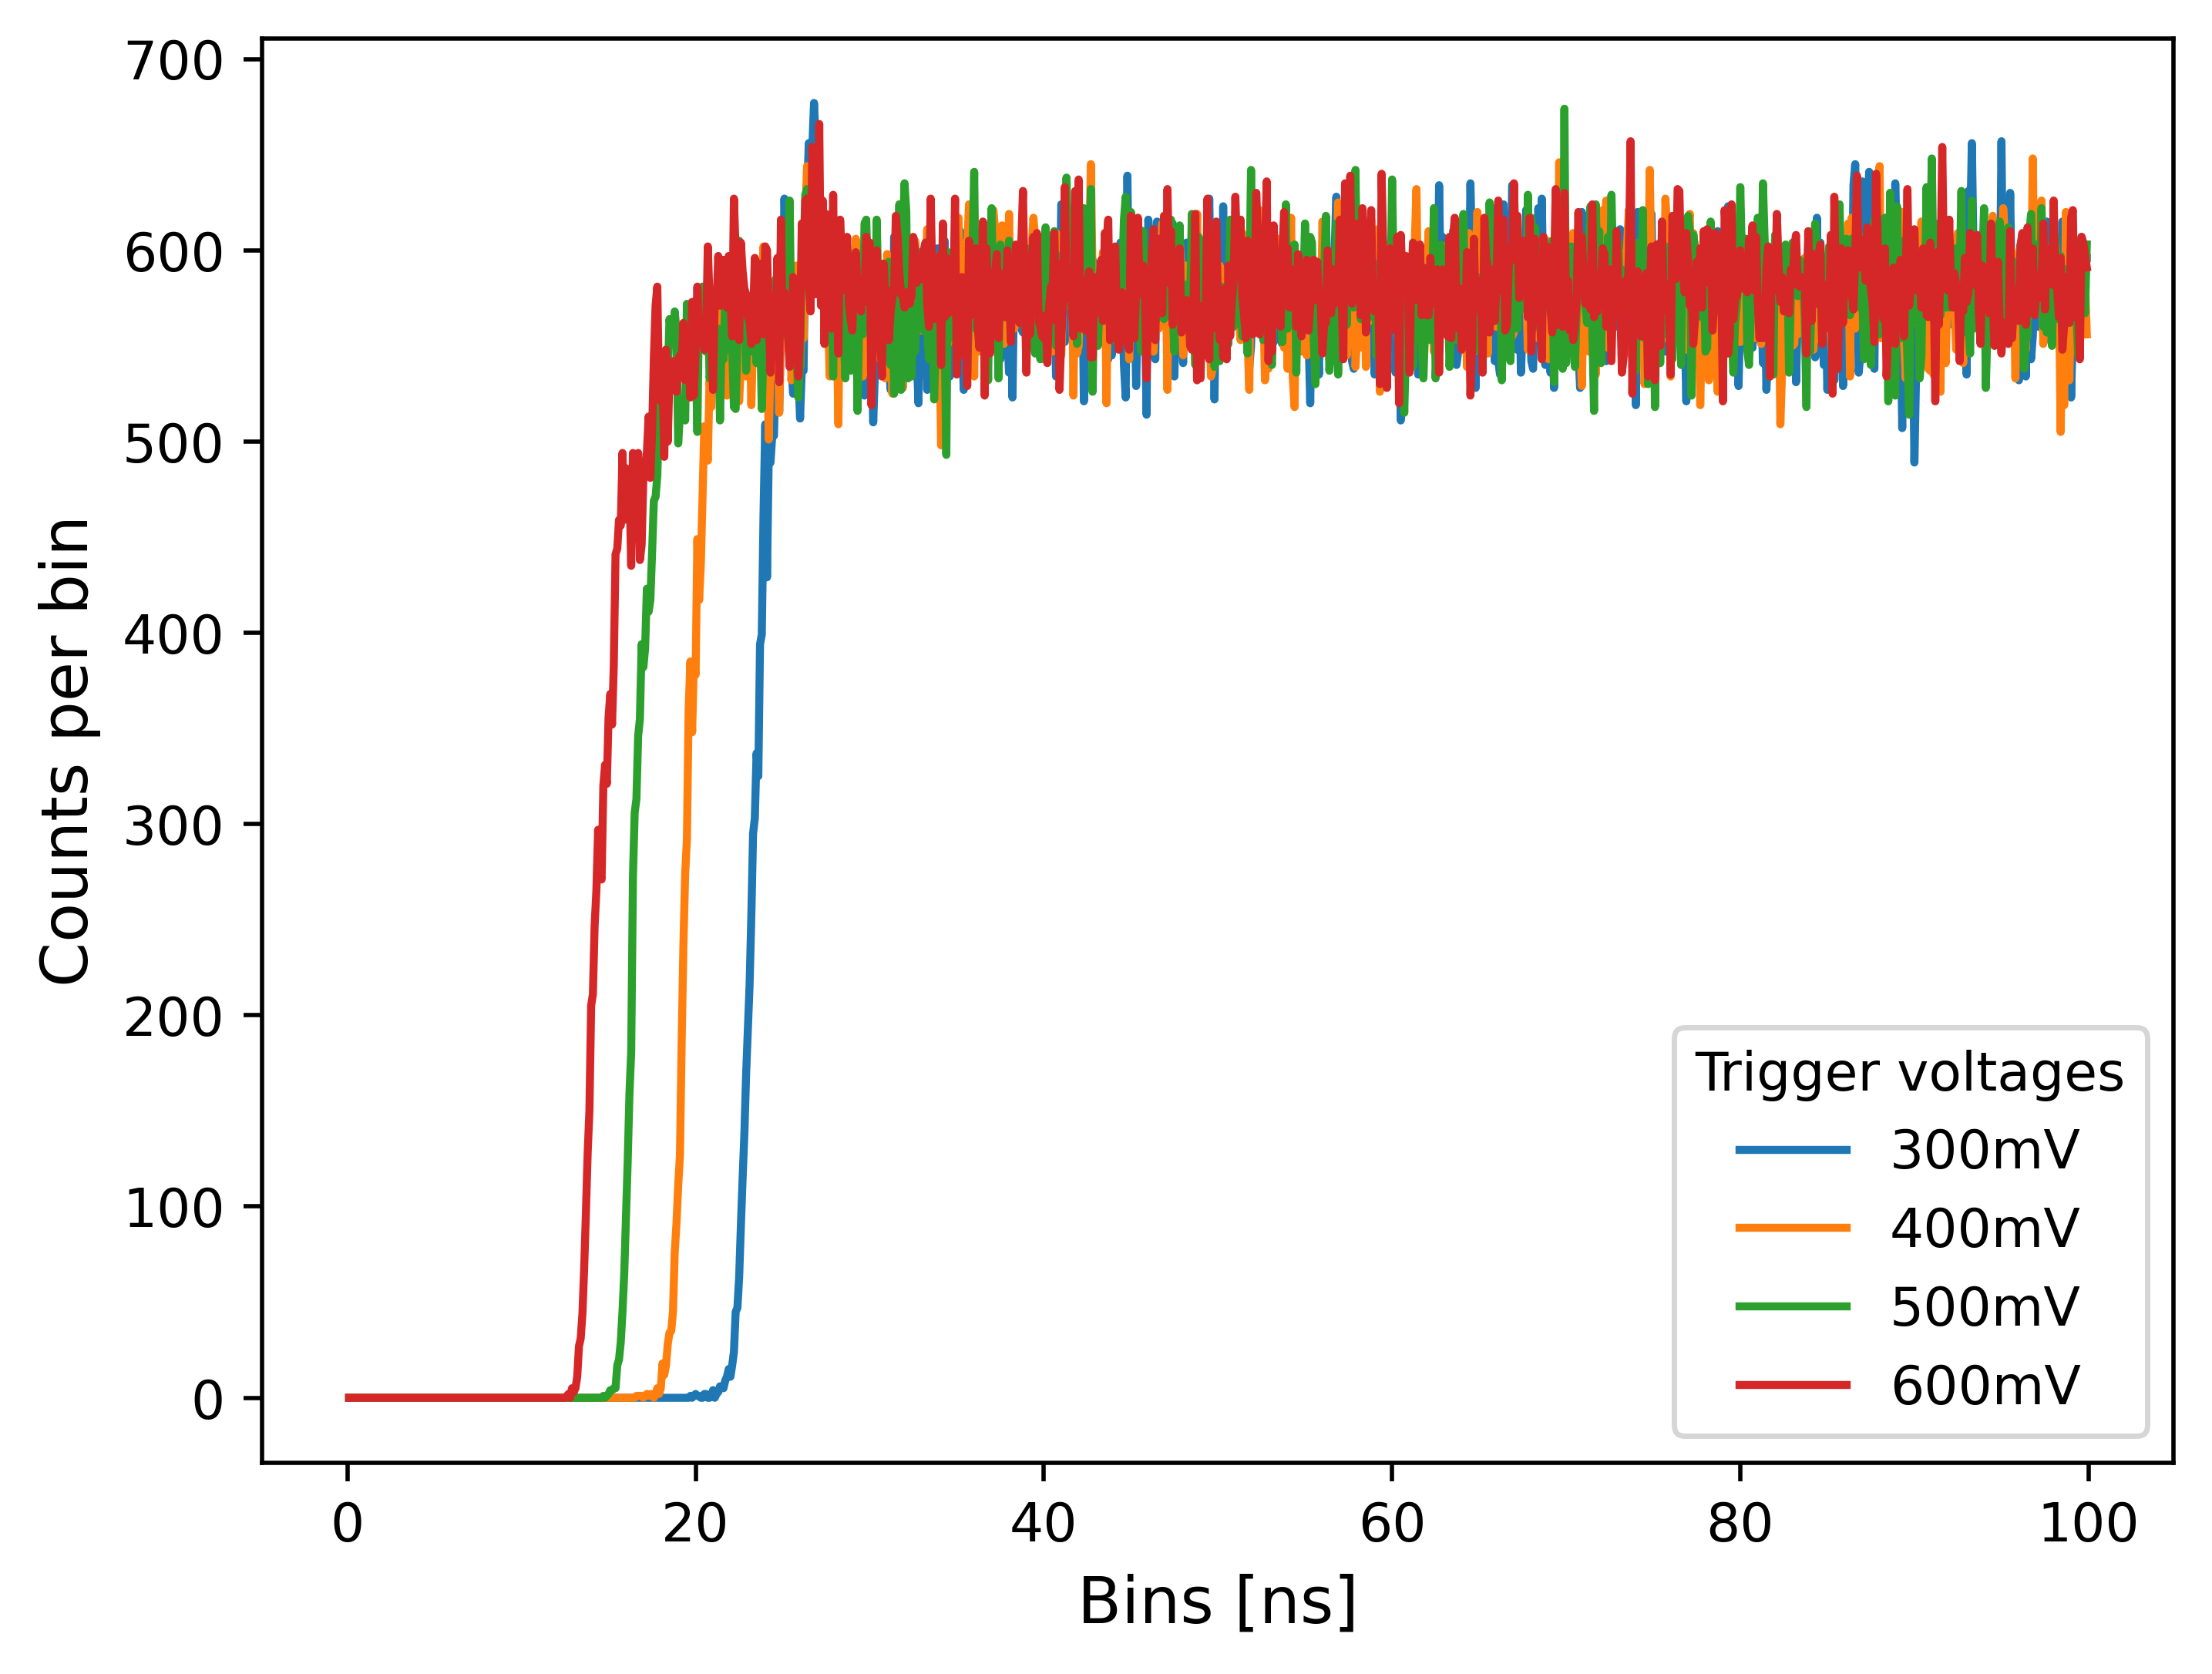

In [24]:
#Data for bias current 28uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_28uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_28uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_28uA[4].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_28uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_28uA[5].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_28uA[1]}", skiprows=2,usecols=[1]), label=str(hist_arr_28uA[1].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_28uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_28uA[3].split(".txt")[0][41:-4]))

plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_28uA_trigg_300-600mV_thesis.png"
plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

In [25]:
#Data for bias current 26uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[6]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[6].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[0]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[0].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[3].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[5].split(".txt")[0][41:-4]))

# plt.title(f'Counts per bin (100ps) - Bias current 26uA - Channel {1}')
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_26uA_trigg_300-600mV_thesis.png"
plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')


In [26]:
#Data for bias current 26uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[0]}", skiprows=2,usecols=[0])/1000

plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[6]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[6].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[0]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[0].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[3]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[3].split(".txt")[0][41:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_26uA[5]}", skiprows=2,usecols=[1]), label=str(hist_arr_26uA[5].split(".txt")[0][41:-4]))

plt.title(f'Counts per bin (100ps) - Bias current 26uA - Channel {1}')
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

name_for_saving = f"HQO_20240708_Deadtime_Channel_{channel}_Bias_26uA_trigg_300-600mV_thesis.png"

# plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

ax = plt.gca()
xmin= 23
xmax= 30
ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])

# plt.title(f'Counts per bin (100ps) - Bias current 26uA - Channel {1}')
plt.suptitle("Section around the small peak")
plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages',loc='lower right')

In [35]:
# Determine recovery time

#Data for bias current 31.2uA
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[0])/1000

# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[2]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[2].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[6]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[6].split(".txt")[0][43:-4]))
# # plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[0]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[0].split(".txt")[0][43:-4]))
# plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2,usecols=[1]), label=str(hist_arr_31_2uA[4].split(".txt")[0][43:-4]))
plt.plot(x_data,np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2,usecols=[1]))
# fig, ax = plt.subplots()
plt.axhline(y=580, xmin=0.0, xmax=1.0, color='r', linestyle="dashed", label=r"90% $\eta_{sde}$")
plt.axhline(y=280, xmin=0.0, xmax=1.0, color='b', linestyle="dashed", label=r"50% $\eta_{sde}$")
plt.axvline(x=14, ymin=0.0, ymax=1.0, color='r', ls="dashed")
plt.axvline(x=21, ymin=0.0, ymax=1.0, color='r', ls="dashed")

# plt.title(f'Counts per bin (100ps) - Bias current 31_2uA - Channel {1}')
ylabel = 'Counts per bin'
xlabel = 'Bins [ns]'
legend_title = 'Sde efficiency'
saving_name = f"HQO_20240710_Deadtime_Channel_{channel}_Bias_31_2uA_trig_600mV_thesis"

plott_settings_default("", xlabel, ylabel, saving_name, legend_title)

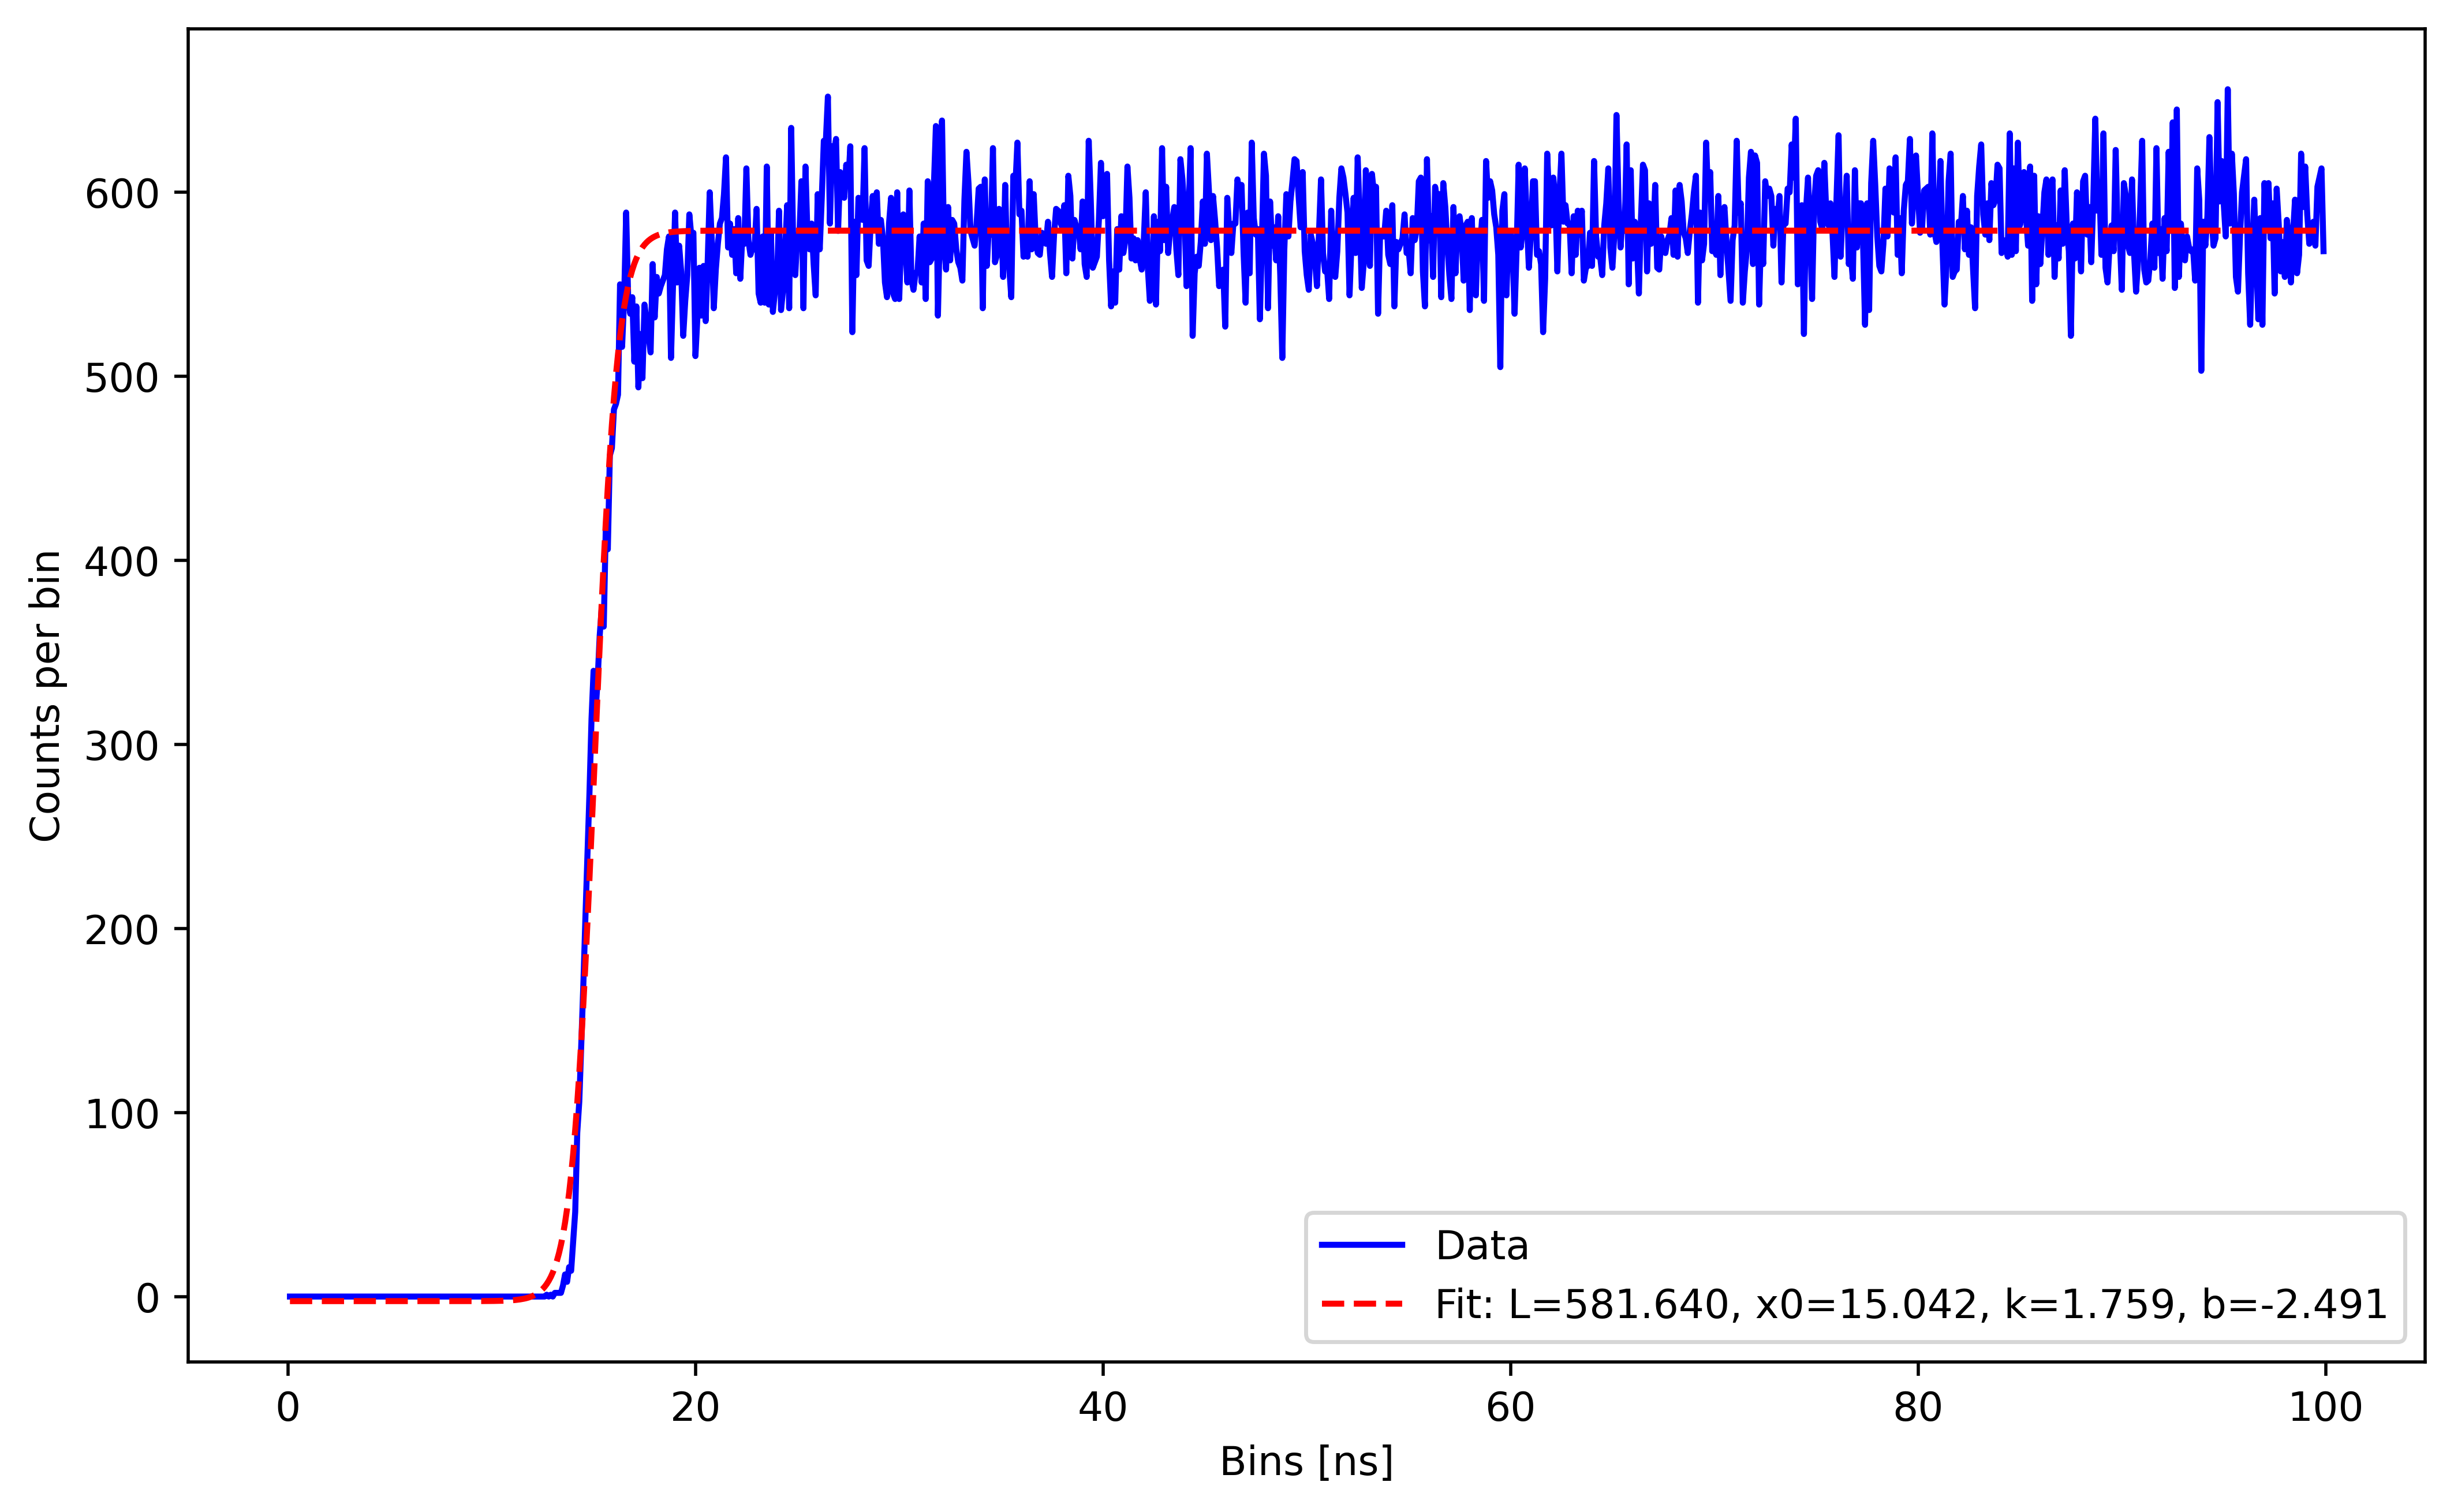

In [33]:
# Step 1: Define the fitting function
def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

def sigmoid(x, L, x0, k, b):
    return L / (1 + np.exp(-k*(x-x0))) + b

# Step 2: Load your data
x_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2, usecols=[0])/1000
y_data = np.loadtxt(f"Dead_time/Deadtime_26062024/{hist_arr_31_2uA[4]}", skiprows=2, usecols=[1])

# Initial guess for the parameters
p0 = [max(y_data), np.median(x_data), 10, min(y_data)]

# Fit the function to your data
popt, pcov = curve_fit(sigmoid, x_data, y_data, p0=p0)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'b-', label='Data')
plt.plot(x_data, sigmoid(x_data, *popt), 'r--', label=f'Fit: L={popt[0]:.3f}, x0={popt[1]:.3f}, k={popt[2]:.3f}, b={popt[3]:.3f}')
plt.xlabel('Bins [ns]')
plt.ylabel('Counts per bin')
plt.legend()
plt.show()

# Recovery time 23.07.2024 - Count rate: 0.493851MHz 


In [7]:
dead_time_measurements_all_2307 = os.listdir("./Dead_time/Deadtime_23072024")

recovery_time_31_2 = np.sort(get_list_by_bias(dead_time_measurements_all_2307, "31_2"))
recovery_time_29 = np.sort(get_list_by_bias(dead_time_measurements_all_2307, "29"))
recovery_time_27 = np.sort(get_list_by_bias(dead_time_measurements_all_2307, "27"))
recovery_time_25 = np.sort(get_list_by_bias(dead_time_measurements_all_2307, "25"))

channel = 1

In [14]:
#Data for bias current 31.2uA
x_data = np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[0]}", skiprows=2, usecols=[0]) / 1000

plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[2]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_31_2[2].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[3]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[3].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[4]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[4].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[5]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[5].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[6]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[6].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[7]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[7].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[8]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[8].split(".txt")[0][20:-11]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[0]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_31_2[0].split(".txt")[0][20:-11]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_31_2[1]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_31_2[1].split(".txt")[0][20:-11]))

plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages', loc='lower right')
# 
name_for_saving = f"HQO_20240723_recovery_time_Channel_{channel}_Bias_31_2uA_trigg_300-900mV_thesis.png"
# plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

# plott_settings_default("", "Bins [ns]", "Counts per bin", name_for_saving, "Trigger voltages", 0)

In [89]:
#Data for bias current 29uA

x_data = np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[0]}", skiprows=2, usecols=[0]) / 1000

plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[2]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[2].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[3]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[3].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[4]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[4].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[5]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[5].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[6]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[6].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[7]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[7].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[8]}", skiprows=2, usecols=[1]),
            label=str(recovery_time_29[8].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[0]}", skiprows=2, usecols=[1]), 
#             label=str(recovery_time_29[0].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_29[1]}", skiprows=2, usecols=[1]),
#             label=str(recovery_time_29[1].split(".txt")[0][20:-9]))

plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages', loc='lower right')

# name_for_saving = f"HQO_20240723_recovery_time_Channel_{channel}_Bias_29uA_trigg_300-1000mV_thesis.png"
# # plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')
# 
# plott_settings_default("", "Bins [ns]", "Counts per bin", name_for_saving, "Trigger voltages", 0)

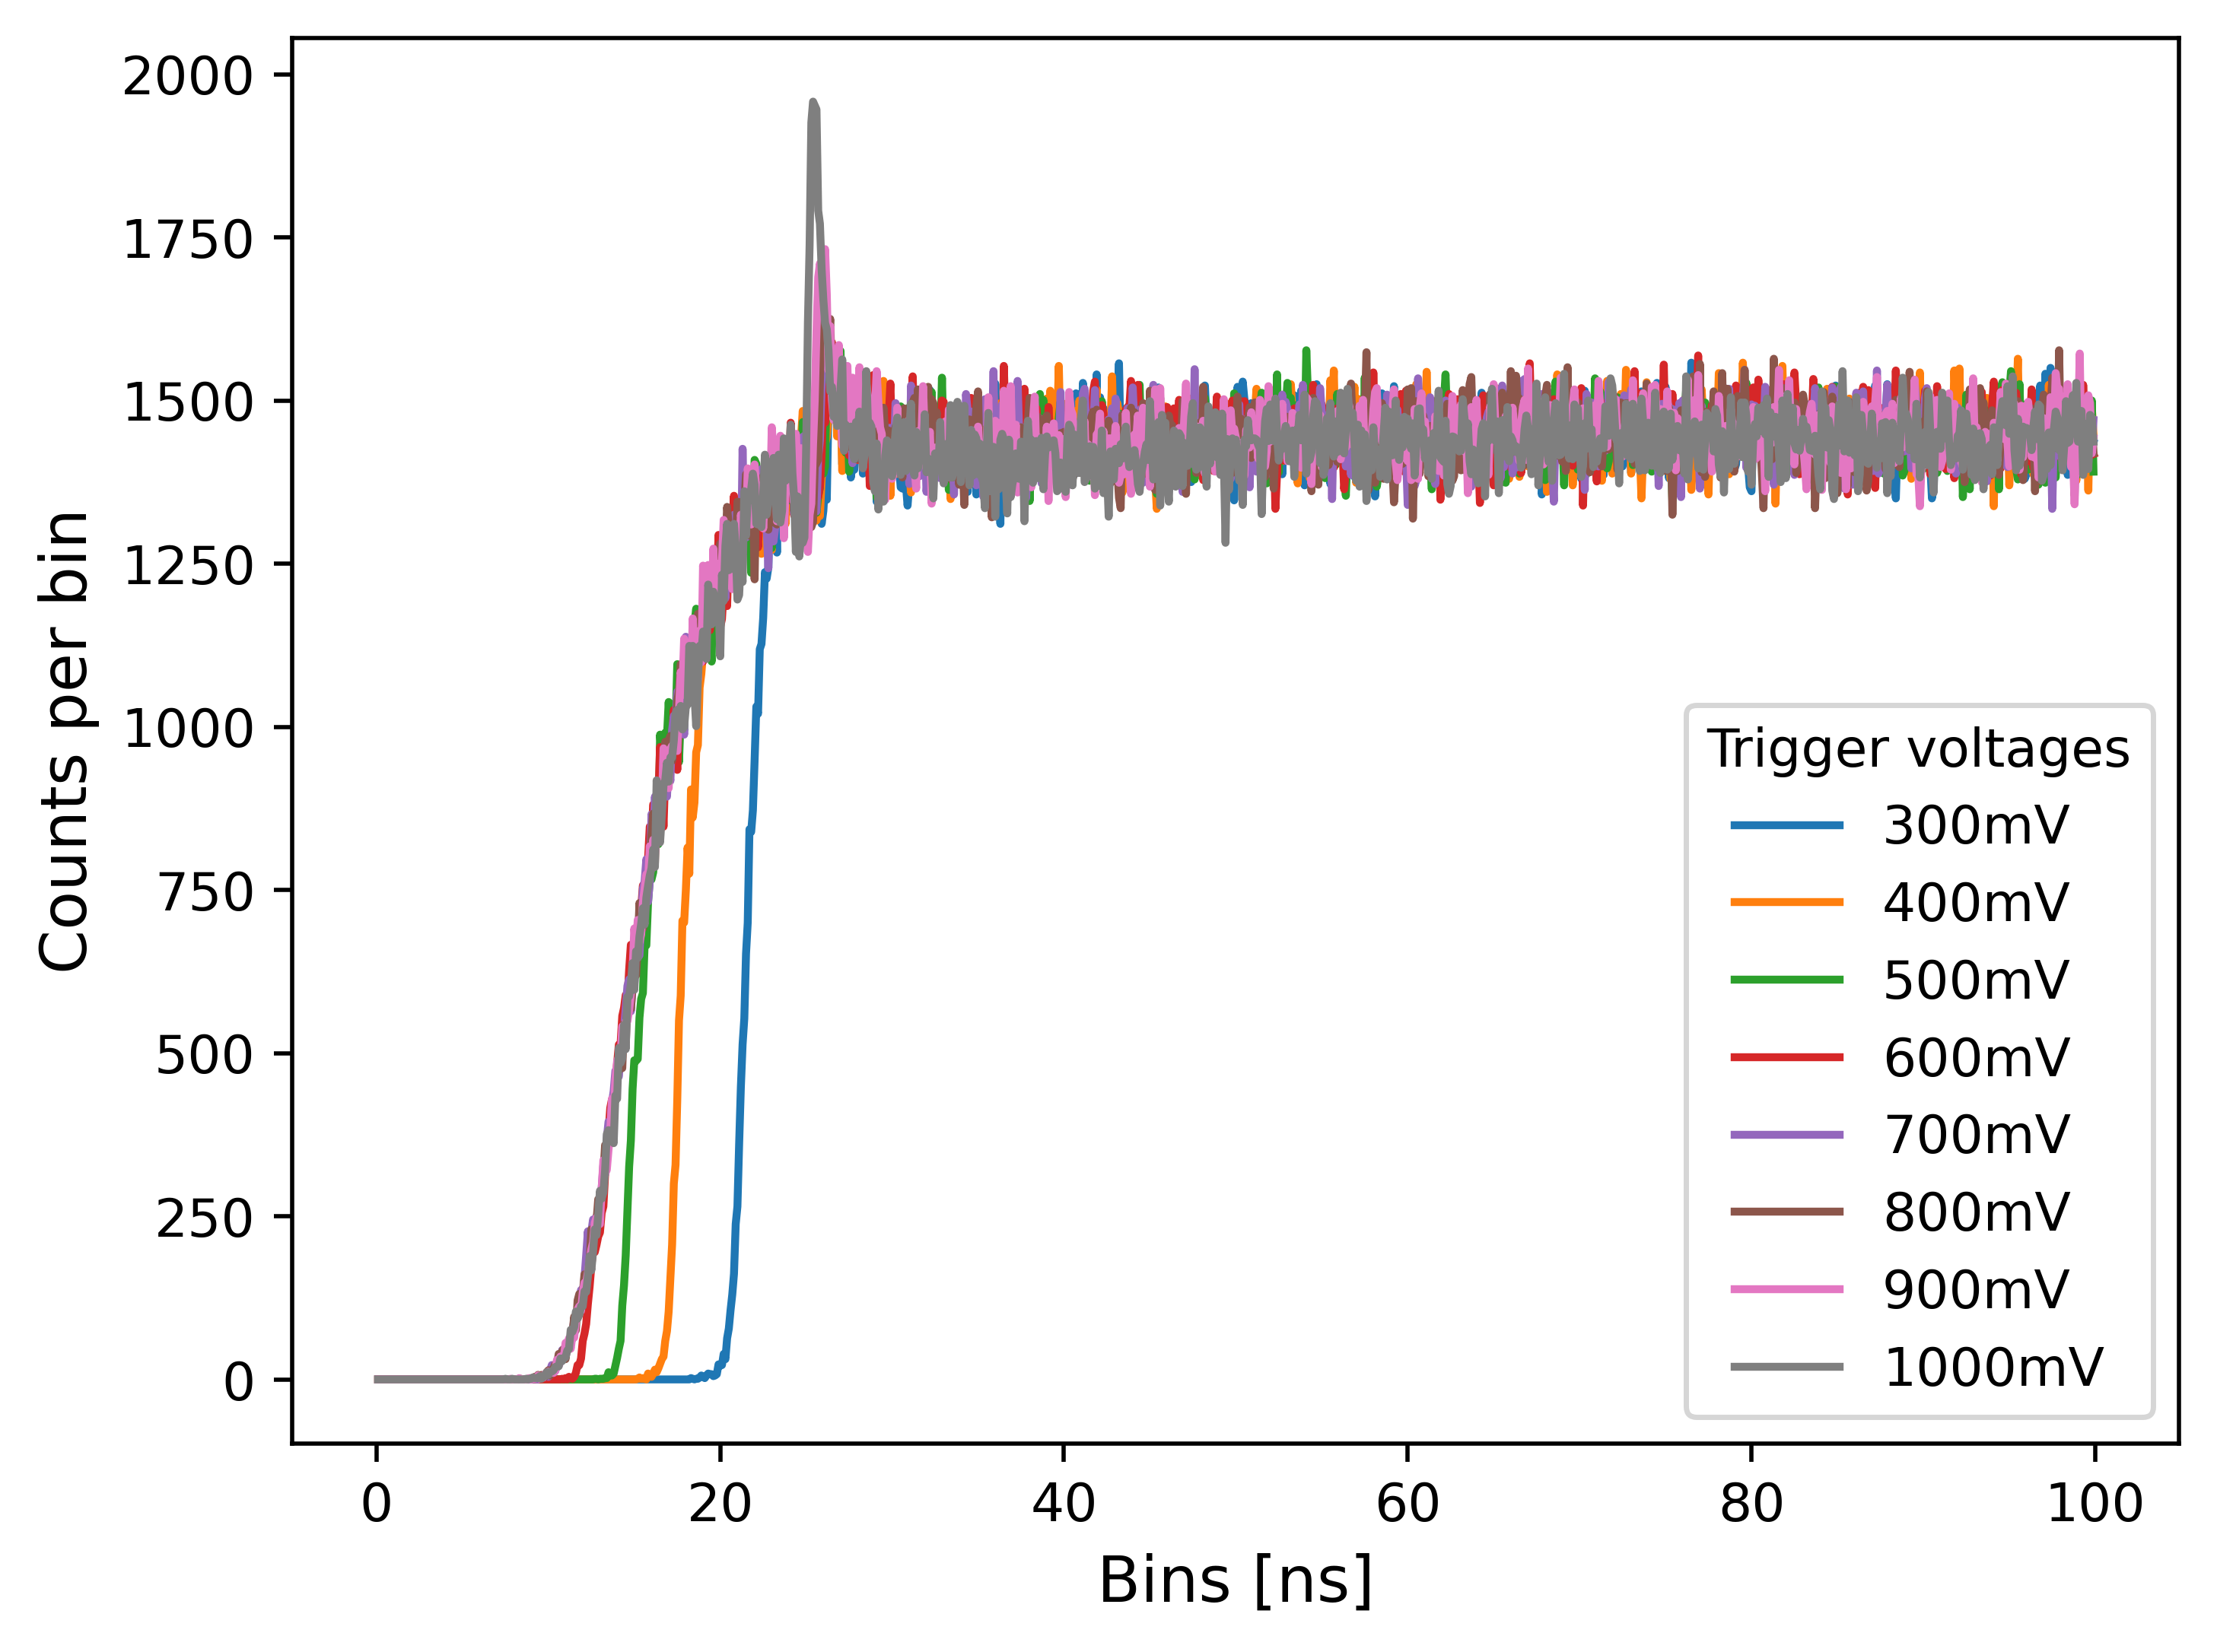

In [52]:
#Data for bias current 27uA
x_data = np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[0]}", skiprows=2, usecols=[0]) / 1000

plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[2]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[2].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[3]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[3].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[4]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[4].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[5]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[5].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[6]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[6].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[7]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[7].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[8]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[8].split(".txt")[0][20:-9]))
plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_27[0]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_27[0].split(".txt")[0][20:-9]))


plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages', loc='lower right')

name_for_saving = f"HQO_20240723_recovery_time_Channel_{channel}_Bias_27uA_trigg_300-1000mV_thesis.png"
# plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')  

plott_settings_default("", "Bins [ns]", "Counts per bin", name_for_saving, "Trigger voltages", 0)

In [8]:
#Data for bias current 25uA
x_data = np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[0]}", skiprows=2, usecols=[0]) / 1000

plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[1]}", skiprows=2, usecols=[1]),
         label=str(recovery_time_25[1].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[2]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[2].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[3]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[3].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[4]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[4].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[5]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[5].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[6]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[6].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[7]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[7].split(".txt")[0][20:-9]))
# plt.plot(x_data, np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_25[0]}", skiprows=2, usecols=[1]),
#          label=str(recovery_time_25[0].split(".txt")[0][20:-9]))


plt.ylabel('Counts per bin', fontsize="12")
plt.xlabel('Bins [ns]', fontsize="12")
plt.legend(title='Trigger voltages', loc='lower right')

name_for_saving = f"HQO_20240723_recovery_time_Channel_{channel}_Bias_25uA_trigg_300-900mV_thesis.png"
# plt.savefig(f'../mythesis_HQO_Reicherd/figs/{name_for_saving}', bbox_inches='tight')

# plott_settings_default("", "Bins [ns]", "Counts per bin", name_for_saving, "Trigger voltages", 0)

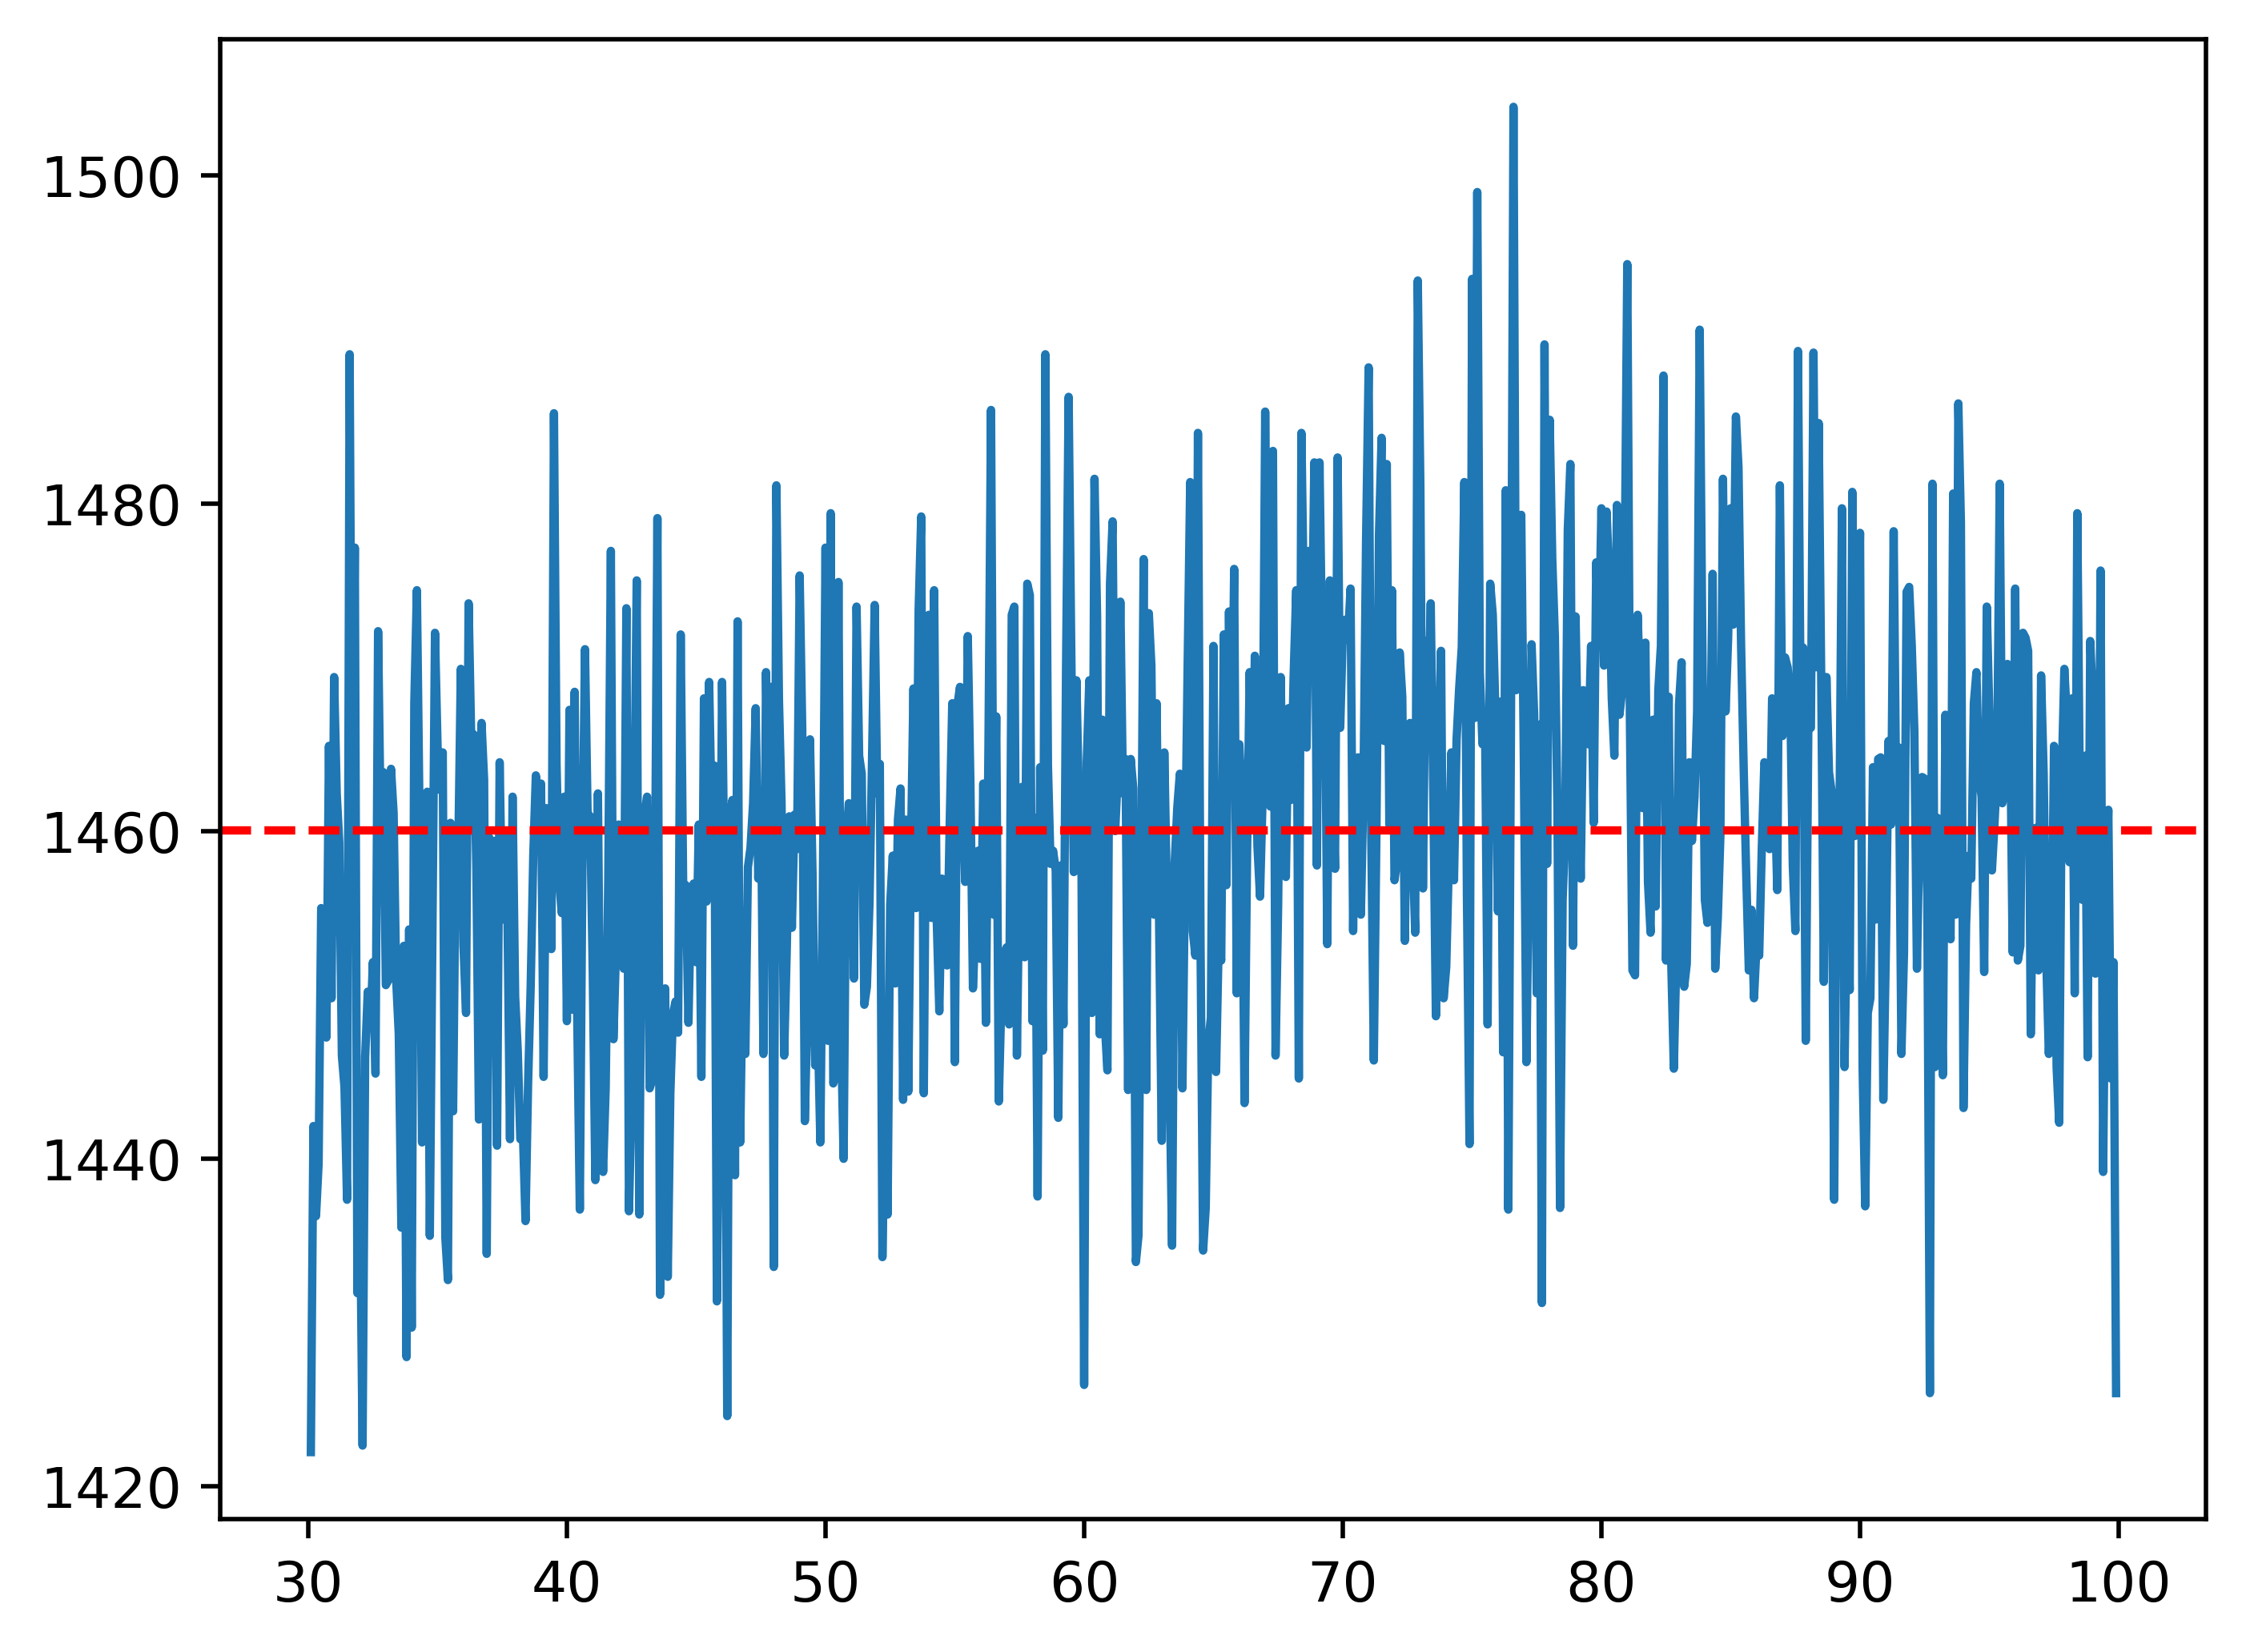

In [24]:
# Determine recovery time
recovery_time_determination = get_list_by_bias(dead_time_measurements_all_2307, "21_2")
x_data = np.loadtxt(f"Dead_time/Deadtime_23072024/{recovery_time_determination[0]}", skiprows=2, usecols=[0]) / 1000

# List of file paths
file_paths = [
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[0]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[1]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[2]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[3]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[4]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[5]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[6]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[7]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[8]}",
    f"Dead_time/Deadtime_23072024/{recovery_time_determination[9]}"
]

# Initialize an empty list to store data
data_list = []

# Read and aggregate data from each file
for file_path in file_paths:
    data = np.loadtxt(file_path, skiprows=2, usecols=[1])
    data_list.append(data)

# Convert list to NumPy array
data_array = np.array(data_list)

# Compute the average across the files
recovery_time_avg_31_2_uA_600mV = np.mean(data_array, axis=0)

# print(x_data[x_data > 30])
# print(recovery_time_avg_31_2_uA_600mV[x_data > 30])
count_saturated = np.mean(recovery_time_avg_31_2_uA_600mV[x_data > 30])

plt.plot(x_data[x_data > 30], recovery_time_avg_31_2_uA_600mV[x_data > 30])
plt.axhline(y=count_saturated, xmin=0.0, xmax=1.0, color='r', linestyle="dashed", label="Saturated")
# Save or print the averaged data
# np.savetxt('averaged_data.txt', recovery_time_avg_31_2_uA_600mV)

[14.8 14.9 15. ]
0.08164965809277232
50% efficiency: 14.900223711967103 +- 0.08164965809277232
Recovery time for 31.2uA bias current:17.15575705120587 +- 0.4444097208657802
Reset time for 31.2uA bias current:3.205667445758886 +- 0.44721359549995865
Dead time: 13.950089605446985  +- 0.04999999999999982


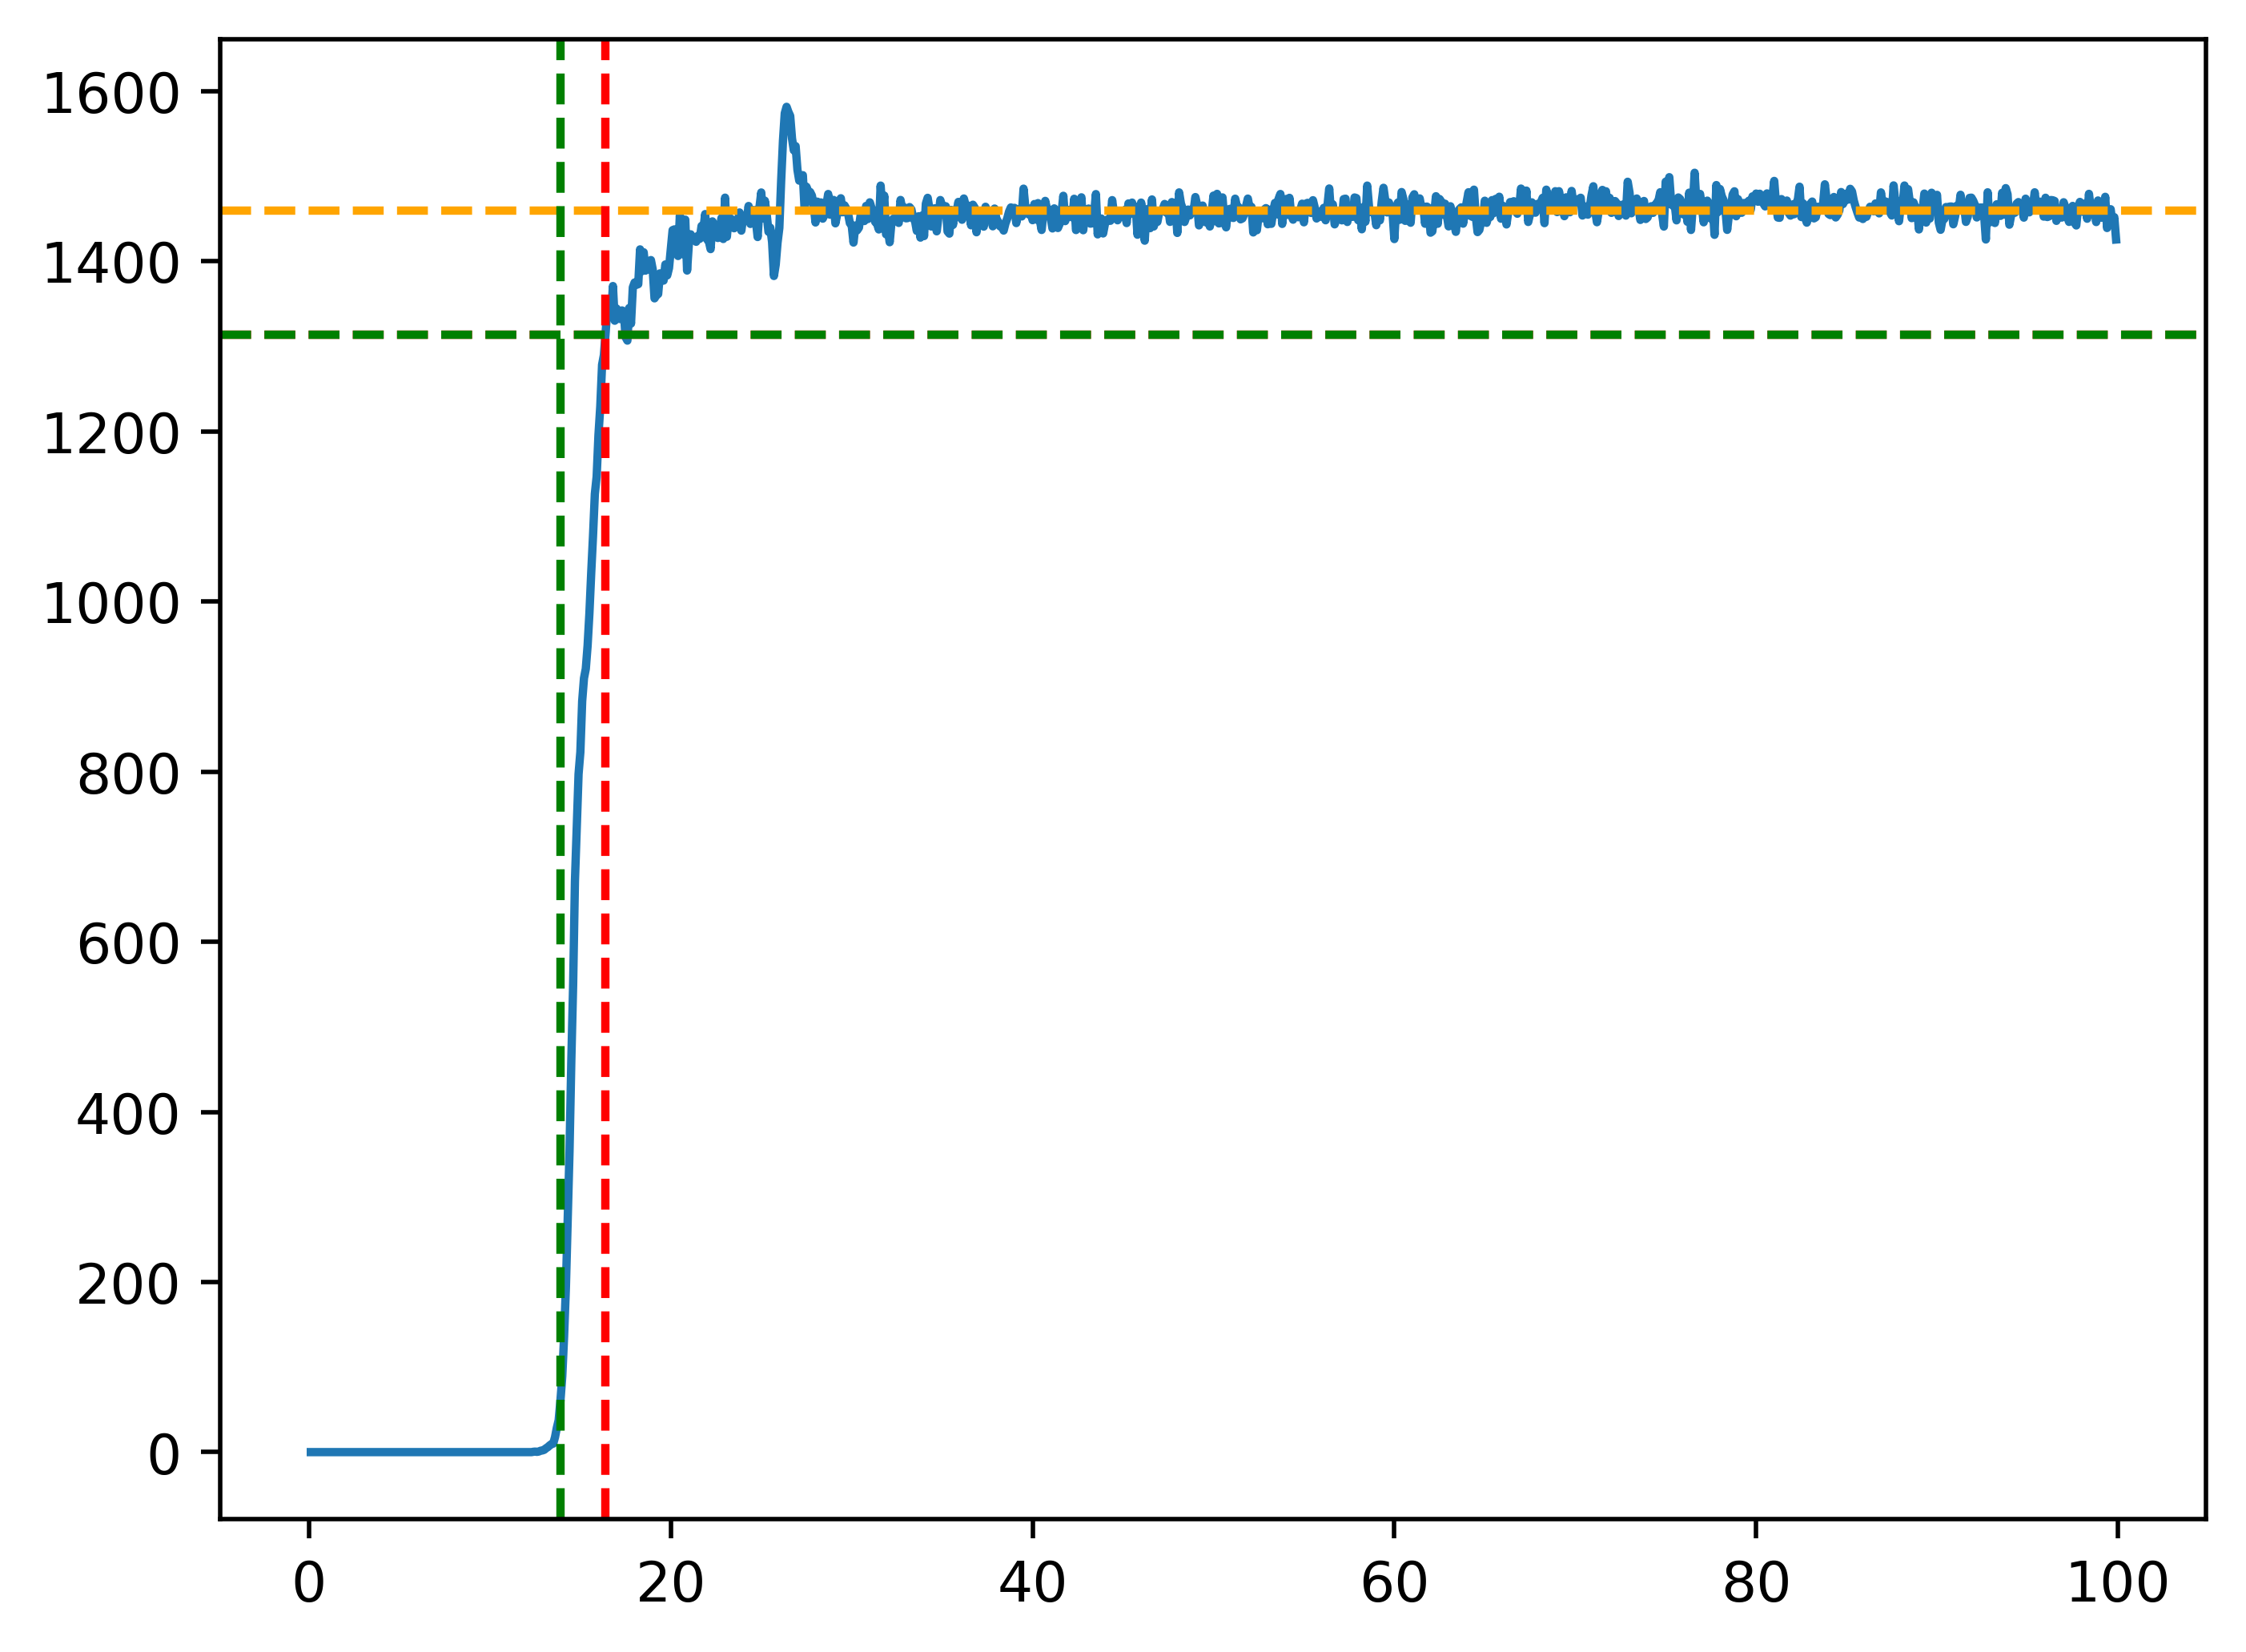

In [107]:
# error calculation
recovery_time_std_31_2_uA_600mV_90 = np.std(data_array, axis=0)[recovery_time_avg_31_2_uA_600mV > count_saturated*0.9][0]
recovery_time_std_31_2_uA_600mV_05 = np.std(data_array, axis=0)[recovery_time_avg_31_2_uA_600mV > count_saturated*0.05][0]
recovery_time_std_31_2_uA_600mV_50 = np.std(data_array, axis=0)[recovery_time_avg_31_2_uA_600mV > count_saturated*0.5][0]

#percentage fluctuation
fluctuation_90 = recovery_time_std_31_2_uA_600mV_90/count_saturated
fluctuation_05 = recovery_time_std_31_2_uA_600mV_05/count_saturated
fluctuation_50 = recovery_time_std_31_2_uA_600mV_50/count_saturated

indices_90 = np.where((recovery_time_avg_31_2_uA_600mV > count_saturated*(0.9-fluctuation_90)) & (recovery_time_avg_31_2_uA_600mV < count_saturated*(0.9+fluctuation_90)))
indices_50 = np.where((recovery_time_avg_31_2_uA_600mV > count_saturated*(0.48-fluctuation_50)) & (recovery_time_avg_31_2_uA_600mV < count_saturated*(0.55+fluctuation_50)))
indices_05 = np.where((recovery_time_avg_31_2_uA_600mV > count_saturated * 0.041) & (recovery_time_avg_31_2_uA_600mV < count_saturated * 0.07))


time_avg_90 = np.sqrt(np.mean((x_data[indices_90]**2)))
time_avg_50 = np.sqrt(np.mean((x_data[indices_50]**2)))
time_avg_05 = np.sqrt(np.mean((x_data[indices_05]**2)))

time_std_90 = np.std(x_data[indices_90], axis=0)
time_std_05 = np.std(x_data[indices_05], axis=0)
time_std_50 = np.std(x_data[indices_50], axis=0)
print(x_data[indices_50])
print(time_std_50)

plt.plot(x_data, recovery_time_avg_31_2_uA_600mV)
plt.axhline(y=count_saturated, xmin=0.0, xmax=1.0, color='orange', linestyle="dashed", label=r"100% $\eta_{sde}$")
plt.axhline(y=0.9*count_saturated, xmin=0.0, xmax=1.0, color='r', linestyle="dashed", label=r"90% $\eta_{sde}$")
plt.axhline(y=0.9*count_saturated, xmin=0.0, xmax=1.0, color='g', linestyle="dashed", label=r"05% $\eta_{sde}$")
plt.axvline(x=x_data[indices_90[0][0]], ymin=0.0, ymax=1.0, color='r', ls="dashed")
plt.axvline(x=x_data[indices_05[0][0]], ymin=0.0, ymax=1.0, color='g', ls="dashed")

#calculate root mean square error
rms_reset_time = np.sqrt(np.mean((time_std_90**2 + time_std_05**2)))

# recovery time
print(f"50% efficiency: {time_avg_50} +- {time_std_50}")
print(f"Recovery time for 31.2uA bias current:{time_avg_90} +- {time_std_90}")
print(f"Reset time for 31.2uA bias current:{time_avg_90 - time_avg_05} +- {rms_reset_time}")
print(f"Dead time: {time_avg_05}  +- {time_std_05}")

ylabel = 'Counts per bin'
xlabel = 'Bins [ns]'
legend_title = 'Tresholds'
saving_name = f"HQO_20240710_Deadtime_Channel_{channel}_Bias_31_2uA_trig_600mV_thesis"

# plott_settings_default("", xlabel, ylabel, saving_name,legend_title)
